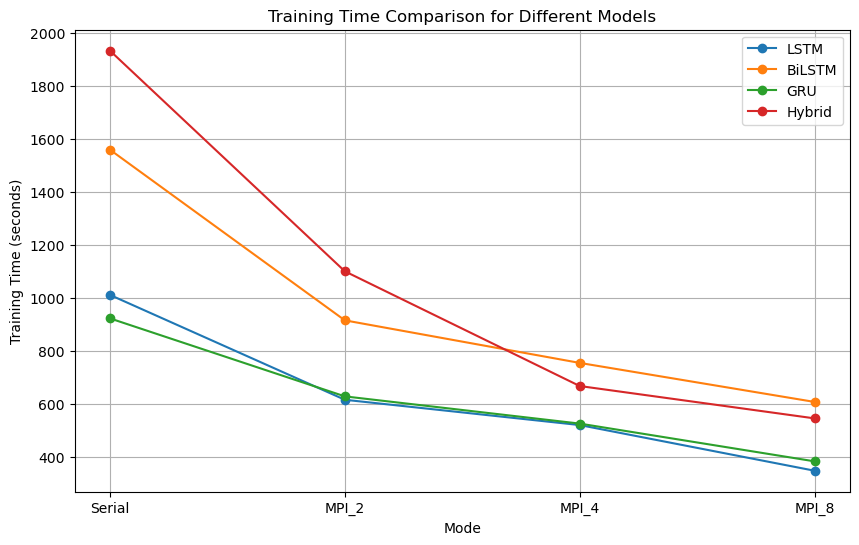

In [2]:
import matplotlib.pyplot as plt
import re

def parse_times(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    times = {'BiLSTM': {}, 'GRU': {}, 'Hybrid': {}, 'LSTM': {}}
    
    for line in lines:
        match = re.match(r'(MPI_\d+|Serial)_(\w+)\.out:Training Time: ([\d\.]+) seconds', line)
        if match:
            mode, model, time = match.groups()
            times[model][mode] = float(time)
    
    return times

def plot_training_times(times):
    models = ['LSTM', 'BiLSTM', 'GRU', 'Hybrid']
    modes = ['Serial', 'MPI_2', 'MPI_4', 'MPI_8']
    
    plt.figure(figsize=(10, 6))
    
    for model in models:
        training_times = [times[model].get(mode, None) for mode in modes]
        plt.plot(modes, training_times, marker='o', label=model)
    
    plt.xlabel('Mode')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time Comparison for Different Models')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    filename = 'FinalTimes.txt'
    times = parse_times(filename)
    plot_training_times(times)

if __name__ == "__main__":
    main()
